# Simple Linear Regression:-(Deep_Learning)

In [6]:
##see the value of multiple statement at once
# output for all comamnds in python jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import tensorflow as tf


In [8]:
import numpy as np

In [23]:
x_data=np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_data=np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_label
y_label

NameError: name 'x_label' is not defined

In [10]:
x_data
y_data

array([ 1.0473831 ,  1.5595251 ,  2.00226637,  2.32740448,  3.44503311,
        5.08583841,  6.26523115,  8.15691249,  9.81323261, 10.56497287])

array([-1.08636257,  0.24135717,  1.04071864,  2.83444116,  5.5652596 ,
        6.68900502,  7.92588983,  7.11543044,  9.84574246,  9.85958962])

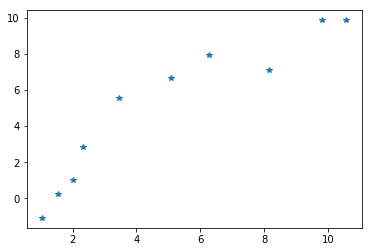

In [11]:
plt.plot(x_data,y_data,'*');

# y=mx + c

In [12]:
np.random.randn(2)

array([ 0.05453726, -0.36070532])

In [17]:
m= tf.Variable(1.02)
c= tf.Variable(0.15)
error=0
for x , y in zip(x_data,y_data):
    y_hat=m*x+c
    error +=(y - y_hat)**2
error

<tf.Tensor 'add_19:0' shape=() dtype=float32>

In [20]:
optmizer= tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optmizer.minimize(error)
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    final_slope,final_intercpt=sess.run([m,c])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
final_intercpt,final_slope

(-0.060918305, 1.0223804)

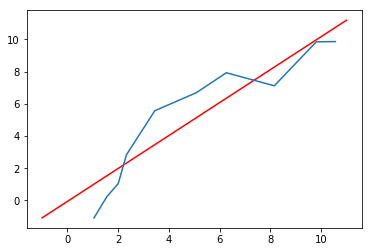

In [22]:
x_test=np.linspace(-1,11,10)
y_pred=final_slope*x_test + final_intercpt
plt.plot(x_test,y_pred,'r')
plt.plot(x_data,y_data)

In [ ]:
# Bigmac Dataset

In [26]:
big_df=pd.read_excel(r'C:\Users\ashis\Downloads\python_class\DEEP_LEARN\BigMaxIndex.xlsx',sheet_name='BigMaxIndex')
big_df.head()
big_df.shape

,Country,Big Mac Price in USD,Hourly Wages in USD
0,Argentina,1.42,1.70
1,Australia,1.86,7.80
2,Brazil,1.48,2.05
3,Britain,3.14,12.30
4,Canada,2.21,9.35


(27, 3)

# Stochastic Gradient Descent:


## Y = m*x+c


## output = Variable1 * Placeholder * Variable2

In [28]:
x = tf.placeholder(dtype=tf.float32,shape=None,name='input')
m=tf.Variable(initial_value=0,dtype=tf.float32)
c=tf.Variable(initial_value=0,dtype=tf.float32)


In [30]:
layer1 = tf.multiply(x,m,name='layer1')
output = tf.add(layer1,c,name='output')
print(layer1)

Tensor("layer1_1:0", dtype=float32)


In [32]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer=tf.summary.FileWriter('./graph2',graph=sess.graph)
    result=sess.run(output,feed_dict={x:5})
    print(result)
    writer.close()

0.0


# Calculating SSE & Back Propagation

In [34]:
y_actual = tf.placeholder(dtype=tf.float32,shape=None,name='actual')
SSE = tf.reduce_sum(tf.square(tf.subtract(output,y_actual)))   # resdual error
optimier = tf.train.GradientDescentOptimizer(learning_rate=.01)
train = optimier.minimize(SSE)

In [35]:

init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer=tf.summary.FileWriter('./graph3',graph=sess.graph)
    result=sess.run(train,feed_dict={x:5,y_actual:1})
    print(result)
    writer.close()

None


# Data Preprocessing:-

In [42]:
x_input = big_df.iloc[:,1:2].values
y_input = big_df.iloc[:,2:3].values
x_input
y_input

array([[1.42],
       [1.86],
       [1.48],
       [3.14],
       [2.21],
       [1.96],
       [1.2 ],
       [1.9 ],
       [4.09],
       [2.98],
       [2.19],
       [1.84],
       [2.18],
       [1.33],
       [2.18],
       [2.22],
       [2.24],
       [1.62],
       [1.32],
       [1.85],
       [1.85],
       [2.7 ],
       [3.6 ],
       [4.6 ],
       [1.38],
       [2.34],
       [2.71]])

array([[ 1.7 ],
       [ 7.8 ],
       [ 2.05],
       [12.3 ],
       [ 9.35],
       [ 2.8 ],
       [ 2.4 ],
       [ 2.4 ],
       [14.4 ],
       [ 9.59],
       [ 3.  ],
       [ 1.5 ],
       [13.6 ],
       [ 3.1 ],
       [ 2.  ],
       [ 6.8 ],
       [ 1.2 ],
       [ 2.2 ],
       [ 2.6 ],
       [ 5.4 ],
       [ 3.9 ],
       [ 5.9 ],
       [10.9 ],
       [17.8 ],
       [ 1.7 ],
       [ 3.2 ],
       [14.3 ]])

# Normalization

In [44]:
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
mmm_x=MinMaxScaler()
mmm_y=MinMaxScaler()
x_norm = mmm_x.fit_transform(x_input)
y_norm = mmm_y.fit_transform(y_input)
x_norm
y_norm

array([[0.06470588],
       [0.19411765],
       [0.08235294],
       [0.57058824],
       [0.29705882],
       [0.22352941],
       [0.        ],
       [0.20588235],
       [0.85      ],
       [0.52352941],
       [0.29117647],
       [0.18823529],
       [0.28823529],
       [0.03823529],
       [0.28823529],
       [0.3       ],
       [0.30588235],
       [0.12352941],
       [0.03529412],
       [0.19117647],
       [0.19117647],
       [0.44117647],
       [0.70588235],
       [1.        ],
       [0.05294118],
       [0.33529412],
       [0.44411765]])

array([[0.03012048],
       [0.39759036],
       [0.05120482],
       [0.6686747 ],
       [0.49096386],
       [0.09638554],
       [0.07228916],
       [0.07228916],
       [0.79518072],
       [0.50542169],
       [0.10843373],
       [0.01807229],
       [0.74698795],
       [0.11445783],
       [0.04819277],
       [0.3373494 ],
       [0.        ],
       [0.06024096],
       [0.08433735],
       [0.25301205],
       [0.1626506 ],
       [0.28313253],
       [0.58433735],
       [1.        ],
       [0.03012048],
       [0.12048193],
       [0.78915663]])

In [45]:
def batching(high,batc_size):
    return np.random.randint(0,high,batc_size)

In [46]:
np.random.randint(0,27,5)

array([ 9,  2, 16, 14,  3])

In [47]:
print(x_norm[batching(27,5)])

[[0.29117647]
 [0.        ]
 [0.03823529]
 [0.05294118]
 [0.57058824]]


# Training Model

Epoch:0,Loss:4.05,Intercept:0.03,Slope:0.01


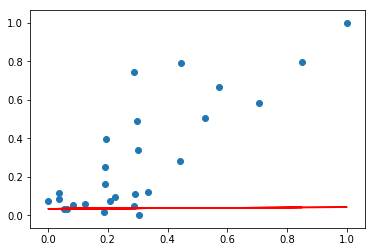

Epoch:100,Loss:0.98,Intercept:0.13,Slope:0.65


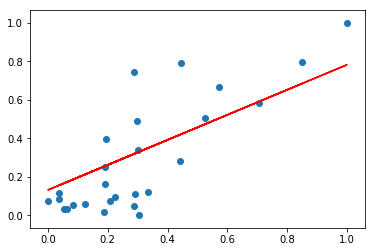

Epoch:200,Loss:0.82,Intercept:0.06,Slope:0.85


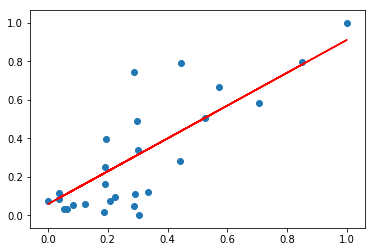

Epoch:300,Loss:0.78,Intercept:0.01,Slope:0.91


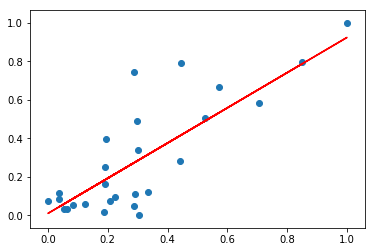

Epoch:400,Loss:0.83,Intercept:-0.03,Slope:0.94


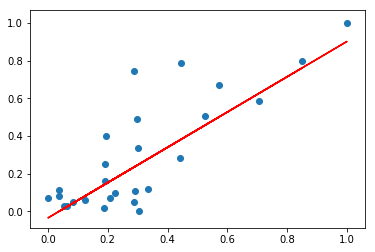

Epoch:500,Loss:0.82,Intercept:0.03,Slope:0.99


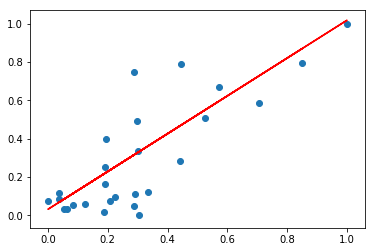

Epoch:600,Loss:0.78,Intercept:-0.01,Slope:0.97


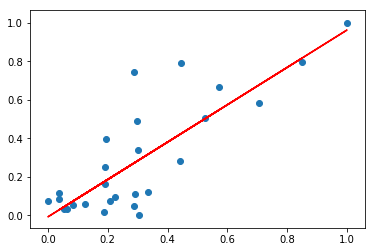

Epoch:700,Loss:0.79,Intercept:0.02,Slope:0.96


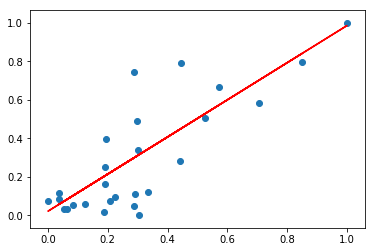

Epoch:800,Loss:0.79,Intercept:0.02,Slope:0.97


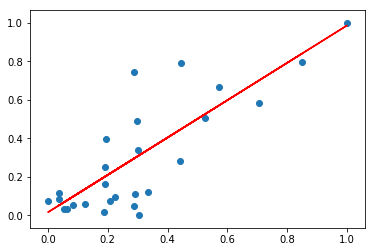

Epoch:900,Loss:0.80,Intercept:-0.03,Slope:0.95


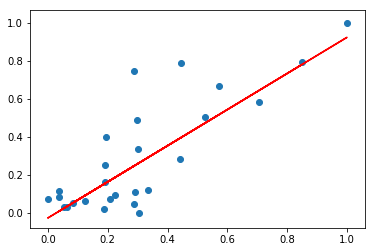

In [62]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer=tf.summary.FileWriter('./linear',graph=sess.graph)
    epochos = 1000
    for i in range(epochos):
        ind = batching(27,8)
        sess.run(train,feed_dict={x:x_norm[ind], y_actual:y_norm[ind]})
        
        if i%100==0:
            
            intercept=sess.run(c,feed_dict={x:x_norm, y_actual:y_norm})    
            slope = sess.run(m,feed_dict={x:x_norm, y_actual:y_norm})
            loss =  sess.run(SSE,feed_dict={x:x_norm, y_actual:y_norm})
            print('Epoch:%s,Loss:%0.2f,Intercept:%0.2f,Slope:%0.2f' %(i,loss,intercept,slope))
            y_hat=intercept+slope*x_norm
            plt.scatter(x_norm,y_norm)
            plt.plot(x_norm,y_hat,'r')
            plt.show();
    writer.close()